<a href="https://colab.research.google.com/github/tmtuan/Demo-CLLocation/blob/master/Copy_of_emnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install emnist library 
# Please visit https://pypi.org/project/emnist/ 
!pip install emnist

In [2]:
# Read training data
from emnist import extract_training_samples
from emnist import extract_test_samples
trainX, trainY = extract_training_samples('letters')
testX, testY = extract_test_samples('letters')
n_train_samples = len(trainY)
n_test_samples = len(testY)
print('Number of training datapoints: %s\n' % n_train_samples)
print('Number of test datapoints: %s\n' % n_test_samples)

Number of training datapoints: 124800

Number of test datapoints: 20800



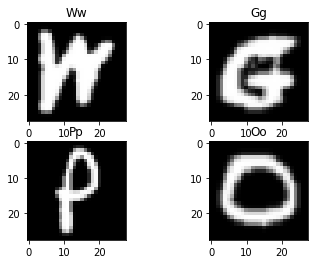

In [3]:
# Plot some samples from the dataset
import matplotlib.pyplot as plt

# Mapping labels to letters
def uppercase_mapping(label):
    return chr(label + 64)
def lowercase_mapping(label):
    return chr(label + 96)
  
# plot the first 4 letters samples
fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title(uppercase_mapping(trainY[0]) + lowercase_mapping(trainY[0]))
axs[0, 0].imshow(trainX[0], cmap=plt.get_cmap('gray'))

axs[0, 1].set_title(uppercase_mapping(trainY[1]) + lowercase_mapping(trainY[1]))
axs[0, 1].imshow(trainX[1], cmap=plt.get_cmap('gray'))

axs[1, 0].set_title(uppercase_mapping(trainY[2]) + lowercase_mapping(trainY[2]))
axs[1, 0].imshow(trainX[2], cmap=plt.get_cmap('gray'))

axs[1, 1].set_title(uppercase_mapping(trainY[3]) + lowercase_mapping(trainY[3]))
axs[1, 1].imshow(trainX[3], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
# Pre-processing dataset
# Convert feature record shape from 2d matrix (28 x 28) to vector (1, 784)
trainX = trainX.reshape((n_train_samples, -1))
testX = testX.reshape((n_test_samples, -1))

In [5]:
#MAIN PART: Build your prediction model
### Example: building the model using Support Vector Machine
from sklearn import svm
svmclassifier = svm.SVC(kernel='linear', C=0.01)
# Training the model
print("Training the SVM model...")
svmclassifier.fit(trainX[:n_train_samples // 10], trainY[:n_train_samples // 10])
print("Done.\n")

Training the SVM model...
Done.



In [6]:
# Make prediction
print("Testing the model...")
predictedY = svmclassifier.predict(testX)
print("Done.\n")

Testing the model...
Done.



In [7]:
# Accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Calculate the accuracy of the model
precision = precision_score(testY, predictedY, average='weighted')
recall = recall_score(testY, predictedY, average='weighted')
f1 = 2 * (precision * recall) / (precision + recall)

## Show the accuracy
print('Accuracy score: {0:0.2f}%'.format(recall * 100))


Accuracy score: 71.01%
